###1) Usando "loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)", programar con keras el GD. Indicar el learning rate, el patience del early stopping y el riesgo empírico finalmente alcanzado.

In [ ]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

# Genero columnas de primera nota / segunda nota y si aprobación segun el dataset
primeras_notas = np.reshape(np.array(dataset[:,0]), (len(dataset), 1))
segundas_notas = np.reshape(np.array(dataset[:,1]), (len(dataset), 1))
aprobaciones = np.array(dataset[:,2])

# Normalizo las columnas de entrada

media_primeras_notas = primeras_notas.mean()
media_segundas_notas = segundas_notas.mean()
varianza_primeras_notas = primeras_notas.std()
varianza_segundas_notas = segundas_notas.std()
primeras_notas_normalizado = np.divide((np.subtract(primeras_notas, media_primeras_notas)), varianza_primeras_notas) 
segundas_notas_normalizado = np.divide((np.subtract(segundas_notas, media_segundas_notas)), varianza_segundas_notas)

# Uno las columnas normalizadas
notas_normalizado = np.append(primeras_notas_normalizado, segundas_notas_normalizado, axis = 1)

# Creo el modelo de Keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5), loss = tf.keras.losses.BinaryCrossentropy(from_logits=True))
hist = model.fit(x=notas_normalizado, y=aprobaciones, batch_size = 100, epochs=1000,callbacks=[es])

print("El learning rate elegido es 5, patience del early stopping 1 y el riesgo empírico 0.2035")

Epoch 1/1000
1/1 [==============================] - 1s 543ms/step - loss: 0.8487
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2977
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2694
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2540
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2440
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2370
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2317
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2276
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2244
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2217
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2195
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2177
Epoch 13/1000
1/1 [===================

###2) El comando compile puede recibir, a demás de optimizer y loss, métricás adicionales. Incorpore "metrics=[’accuracy’]” al mismo e indique el porcentaje de predicciones correctas con el conjunto de train (el único que hay) una vez finalizado el entrenamiento.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10), loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=notas_normalizado, y=aprobaciones, batch_size = 100, epochs=10000,callbacks=[es])

Epoch 1/10000
1/1 [==============================] - 0s 473ms/step - loss: 0.8750 - accuracy: 0.2800
Epoch 2/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2403 - accuracy: 0.8700
Epoch 3/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.2106 - accuracy: 0.8900
Epoch 4/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2078 - accuracy: 0.8800
Epoch 5/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2071 - accuracy: 0.8800
Epoch 6/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2065 - accuracy: 0.8800
Epoch 7/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2061 - accuracy: 0.8800
Epoch 8/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.2057 - accuracy: 0.8800
Epoch 9/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2054 - accuracy: 0.8800
Epoch 10/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2051 - accuracy: 0.8800

In [ ]:
notas_iniciales_normalizadas = np.append(primeras_notas_normalizado, segundas_notas_normalizado, axis = 1)
prediction = model.predict(x=notas_iniciales_normalizadas)   # nota: para predecir hay que usar los datos que se usaron para entrenar                                                 

# Si el resultado es menor que 1/2, se predice que no aprobará. Si es mayor que 1/2, aprobará.

cantidad_aprobados_predichos = (prediction > 0).sum()
print("Se predijo que aprobaron: ", cantidad_aprobados_predichos)
cantidad_aprobados_reales = (aprobaciones == 0).sum()
print("Realmente aprobaron: ", cantidad_aprobados_reales)

accuracy = np.array(hist.history['accuracy'])
print(accuracy) # Muestra porcentaje de predicción


Se predijo que aprobaron:  61
Realmente aprobaron:  40


###3) Grafique el riesgo empírico y el porcentaje de clasificaciones correctas en función de los epochs

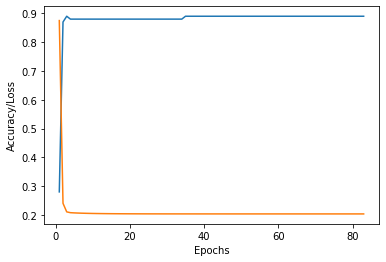

In [ ]:
# Grafico
epochs = np.arange(1, 84, 1)
plt.plot(epochs,accuracy)
plt.plot(epochs, hist.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.show()

###4) Predecir si un alumno con notas de (63, 55) va a aprobar.

In [ ]:
primera_nota_normalizada = (63 - media_primeras_notas) / varianza_primeras_notas
segunda_nota_normalizada = (55 - media_segundas_notas) / varianza_segundas_notas
nota_normalizada = np.array([[primera_nota_normalizada, segunda_nota_normalizada]])
prediccion = model.predict(x=nota_normalizada)
if prediccion < 0 : print("Se estima que el alumno no aprobará")
else: print("Se estima que el alumno aprobará")

Se estima que el alumno no aprobará


###5) Hacer un scatter plot con los datos, ploteando las dos clases con colores diferentes y denotanto las etiquetas en el gráfico. Superponer sobre el mismo la frontera de decisión.


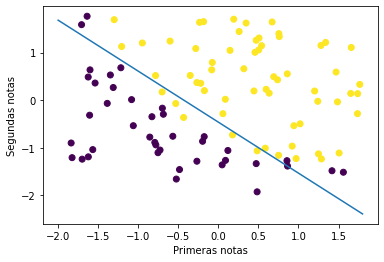

In [ ]:
params = model.get_weights()    # Obtengo los parámetros que me devuelve el modelo (w1 w2 y b)
w1 = params[0][0][0]
w2 = params[0][1][0]
b = params[1][0]

# w1 x1 + w2 x2 + b = 0        # w1 es el peso que tiene la primera nota y w2 el peso que tiene la segunda. b es la ordenada al origen

#x = np.arange(-2, 1.8, 50)
x = np.linspace(-2, 1.8, 50)

# Despejo x2 que sería mi variable dependiente en el scatter plot
y = (-w1*x - b) / w2

plt.plot(x, y)
plt.scatter(primeras_notas_normalizado, segundas_notas_normalizado, c= aprobaciones)
plt.xlabel("Primeras notas")
plt.ylabel("Segundas notas")
plt.show()